In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math as m

In [2]:
os.chdir('..')

In [3]:
results={}

In [4]:
results[12] = np.loadtxt("dev_basic_cuda/results/periodic_boundary/0.06/L_12_p_0.060000_lo_2_ne_5000_ni_1000_nw_10000_up_1_temp_1.400000_step_0.100000_nl_8_nrt_1_read_lattice_0_write_lattice_0_seed_adder_0.txt")
results[14] = np.loadtxt("dev_basic_cuda/results/periodic_boundary/0.06/L_14_p_0.060000_lo_2_ne_5000_ni_1000_nw_10000_up_1_temp_1.400000_step_0.100000_nl_8_nrt_1_read_lattice_0_write_lattice_0_seed_adder_0.txt")
results[18] = np.loadtxt("dev_basic_cuda/results/periodic_boundary/0.06/L_18_p_0.060000_lo_2_ne_5000_ni_1000_nw_10000_up_1_temp_1.400000_step_0.100000_nl_8_nrt_1_read_lattice_0_write_lattice_0_seed_adder_0.txt")
results[64] = np.loadtxt("dev_basic_cuda/results/periodic_boundary/0.06/L_64_p_0.060000_lo_2_ne_500_ni_1000_nw_1000000_up_1_temp_1.400000_step_0.100000_nl_8_nrt_1_read_lattice_0_write_lattice_0_seed_adder_0.txt")

In [5]:
results_new = np.loadtxt("optim/results/0.06_periodic/Y_384_X_384_YSL_128_XSL_128_e_200_p_0.0600_t_1.4000_s_0.1000_w_10000000_i_1000_u_1.txt")

NameError: name 'results_16' is not defined

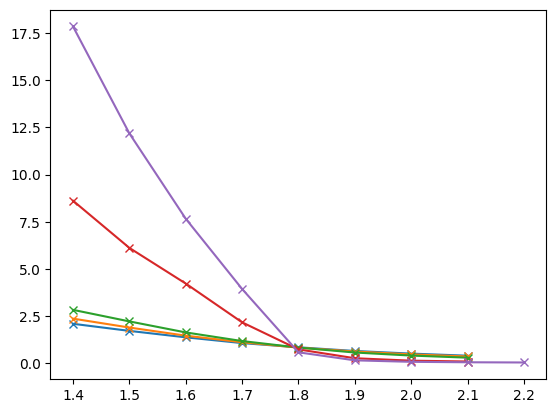

In [6]:
'''
for key in results.keys():
    plt.plot(results[key][:,0], results[key][:,1]/key, label = key, marker = 'x')
'''
plt.plot(results_new[:,0], results_new[:,1]/128, label = 128, marker = 'x')
plt.plot(results_16[:,0], results_16[:,1]/16, label = 16, marker = 'x')
plt.plot(results_8[:,0], results_8[:,1]/8, label = 8, marker = 'x')
plt.plot(results_24[:,0], results_24[:,1]/24, label = 24, marker = 'x')
plt.plot(results_48[:,0], results_48[:,1]/48, label = 48, marker = 'x')
plt.legend()
plt.ylabel(r"$\xi$")
plt.xlabel("Temperature")
plt.ylim([0,5])

In [ ]:


plt.figure(figsize=(10,8))
for f in os.listdir('results/Variances/T07'):
    # Lists to store data points
    x_values = []
    y_values = []
    # Read data from the file
    if(f!='test_lattices'):
        with open("results/Variances/T07/"+f, 'r') as file:
            for line in file:
                # Split each line into two parts separated by a space
                parts = line.split()
                # Append the first part (x value) converted to integer
                x_values.append(int(parts[0]))
                # Append the second part (y value) converted to float
                y_values.append(float(parts[1]))
        # Plot the data
        plt.plot(x_values, y_values, marker='o', linestyle='-', label=f)
plt.xlabel('log(bins) base 2')
plt.ylabel('Var')
plt.title('Data Plot')
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",mode='expand')
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'results/Variances/T07'

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Calc mags from test lattices
mag = {}
for f in os.listdir('results/Variances/test_lattices'):
    idx = f.split('_')[2]
    data_str = ""
    data_array = []
    with open("results/Variances/test_lattices/"+f, 'r') as file:
         data_str = file.read().replace('\n', '')
    data_array = np.array([int(c) for c in data_str])
    data_array[data_array == 0] = -1
    mag[idx] = np.sum(data_array)
ordered_mag = {k: mag[k] for k in sorted(mag)}
print(ordered_mag)

: 

[0, 1, 2]


In [ ]:
mean_mag = (352+358+92+198+264+42+114+292)/8


: 

In [ ]:
# case 8 bins
dev = 0
for val in ordered_mag.values():
    dev += (val-mean_mag)**2
print(m.sqrt(dev/(8*7)))

: 

In [ ]:
# case 2 bins
first_bin_mean = (352+358+92+198)/4
second_bin_mean = (264+42+114+292)/4

mean_dev = m.sqrt(((first_bin_mean-mean_mag)**2+(second_bin_mean-mean_mag)**2)/2)
print(mean_dev)

: 

Here starts with multiple error samples

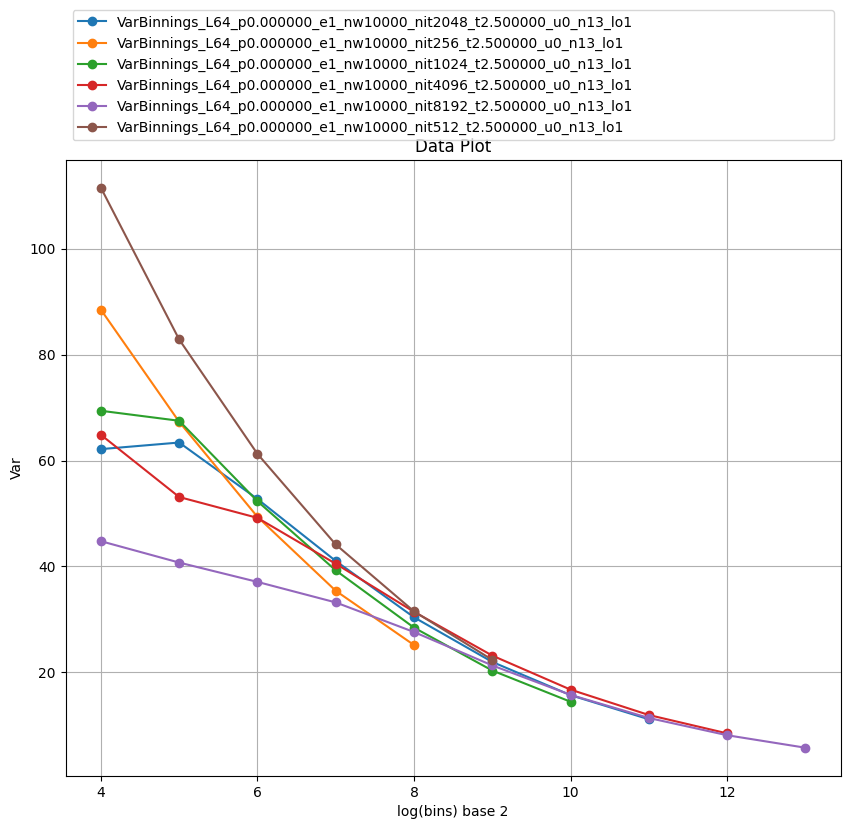

In [ ]:
plt.figure(figsize=(10,8))
for f in os.listdir('./optim/results/Variances/non_random_bond_nw10000_t2.5'):
    # Lists to store data points
    x_values = []
    y_values = []
    # Read data from the file
    with open("./optim/results/Variances/non_random_bond_nw10000_t2.5/"+f, 'r') as file:
        for line in file:
            # Split each line into two parts separated by a space
            parts = line.split()
            # Append the first part (x value) converted to integer
            x_values.append(int(parts[0]))
            # Append the second part (y value) converted to float
            y_values.append(float(parts[1]))
    # Plot the data
    plt.plot(x_values, y_values, marker='o', linestyle='-', label=f)
plt.xlabel('log(bins) base 2')
plt.ylabel('Var')
plt.title('Data Plot')
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",mode='expand')
plt.grid(True)

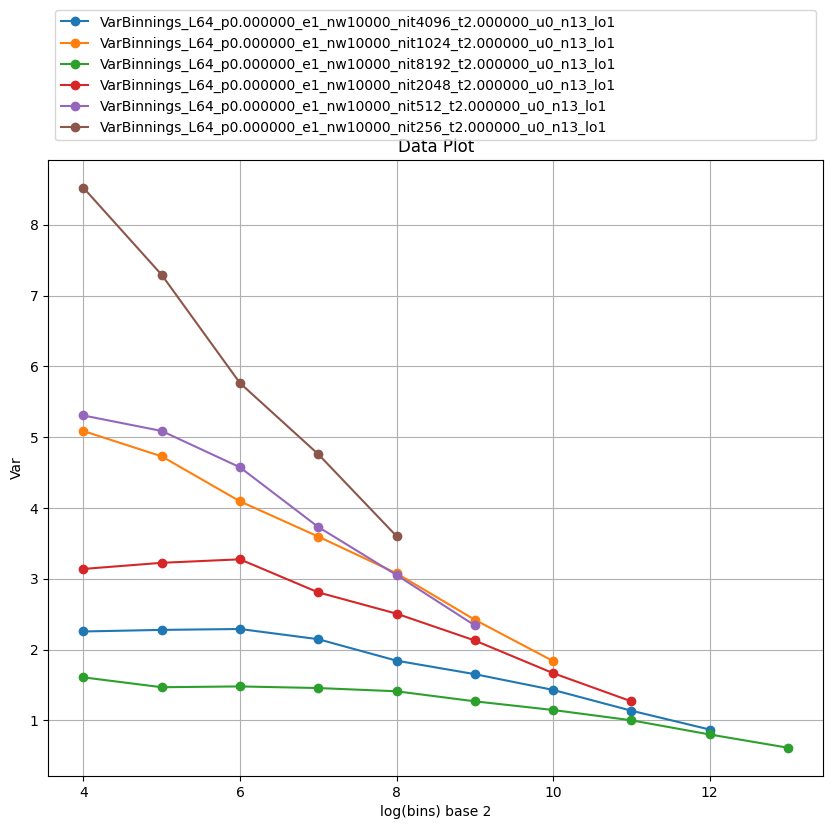

In [ ]:
plt.figure(figsize=(10,8))
for f in os.listdir('./optim/results/Variances/non_random_bond_nw10000_t2'):
    # Lists to store data points
    x_values = []
    y_values = []
    # Read data from the file
    with open("./optim/results/Variances/non_random_bond_nw10000_t2/"+f, 'r') as file:
        for line in file:
            # Split each line into two parts separated by a space
            parts = line.split()
            # Append the first part (x value) converted to integer
            x_values.append(int(parts[0]))
            # Append the second part (y value) converted to float
            y_values.append(float(parts[1]))
    # Plot the data
    plt.plot(x_values, y_values, marker='o', linestyle='-', label=f)
plt.xlabel('log(bins) base 2')
plt.ylabel('Var')
plt.title('Data Plot')
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",mode='expand')
plt.grid(True)

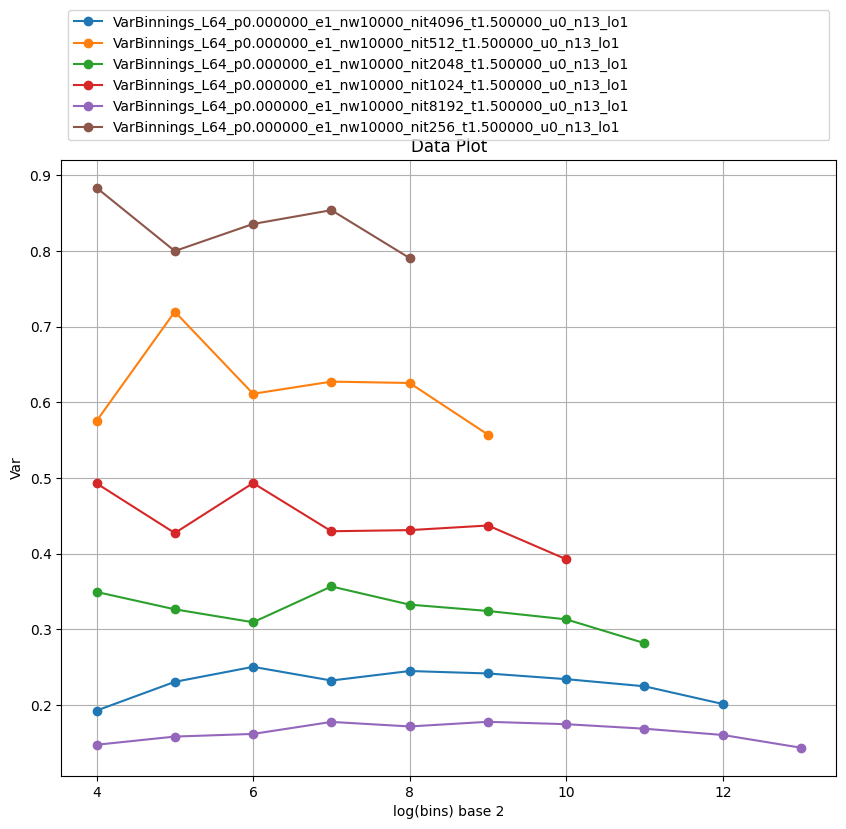

In [ ]:
plt.figure(figsize=(10,8))
for f in os.listdir('./optim/results/Variances/non_random_bond_nw10000_t1.5'):
    # Lists to store data points
    x_values = []
    y_values = []
    # Read data from the file
    with open("./optim/results/Variances/non_random_bond_nw10000_t1.5/"+f, 'r') as file:
        for line in file:
            # Split each line into two parts separated by a space
            parts = line.split()
            # Append the first part (x value) converted to integer
            x_values.append(int(parts[0]))
            # Append the second part (y value) converted to float
            y_values.append(float(parts[1]))
    # Plot the data
    plt.plot(x_values, y_values, marker='o', linestyle='-', label=f)
plt.xlabel('log(bins) base 2')
plt.ylabel('Var')
plt.title('Data Plot')
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",mode='expand')
plt.grid(True)
plt.show()

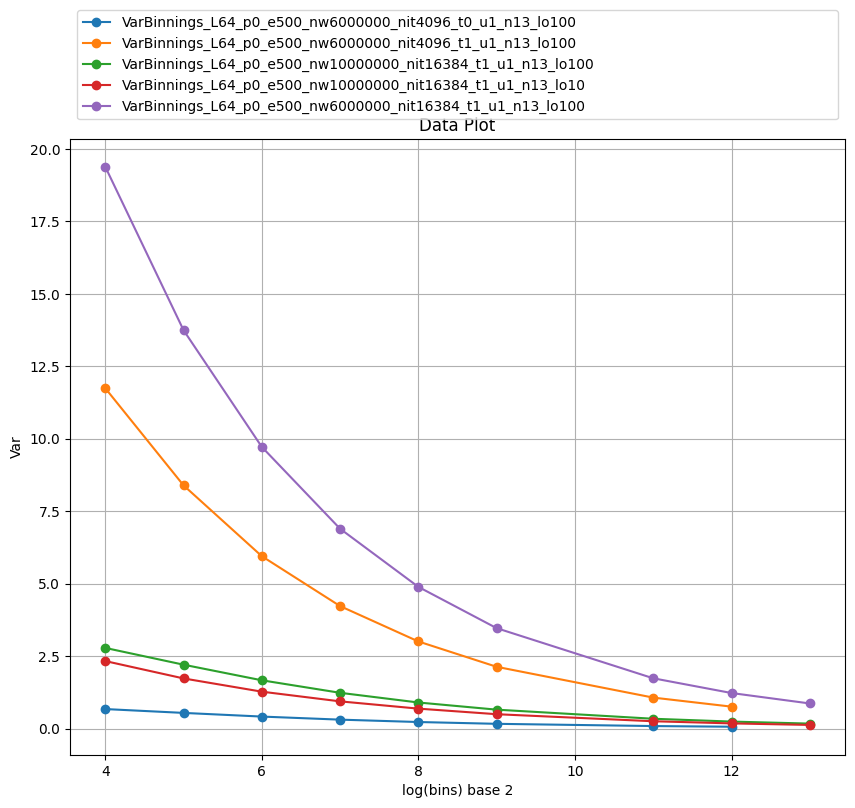

In [ ]:
plt.figure(figsize=(10,8))
for f in os.listdir('./optim/results/Variances/p0'):
    # Lists to store data points
    x_values = []
    y_values = []
    # Read data from the file
    with open("./optim/results/Variances/p0/"+f, 'r') as file:
        for line in file:
            # Split each line into two parts separated by a space
            parts = line.split()
            if(int(parts[0]) != 10):
                # Append the first part (x value) converted to integer
                x_values.append(int(parts[0]))
                # Append the second part (y value) converted to float
                y_values.append(float(parts[1]))
    # Plot the data
    plt.plot(x_values, y_values, marker='o', linestyle='-', label=f)
plt.xlabel('log(bins) base 2')
plt.ylabel('Var')
plt.title('Data Plot')
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",mode='expand')
plt.grid(True)
plt.show()

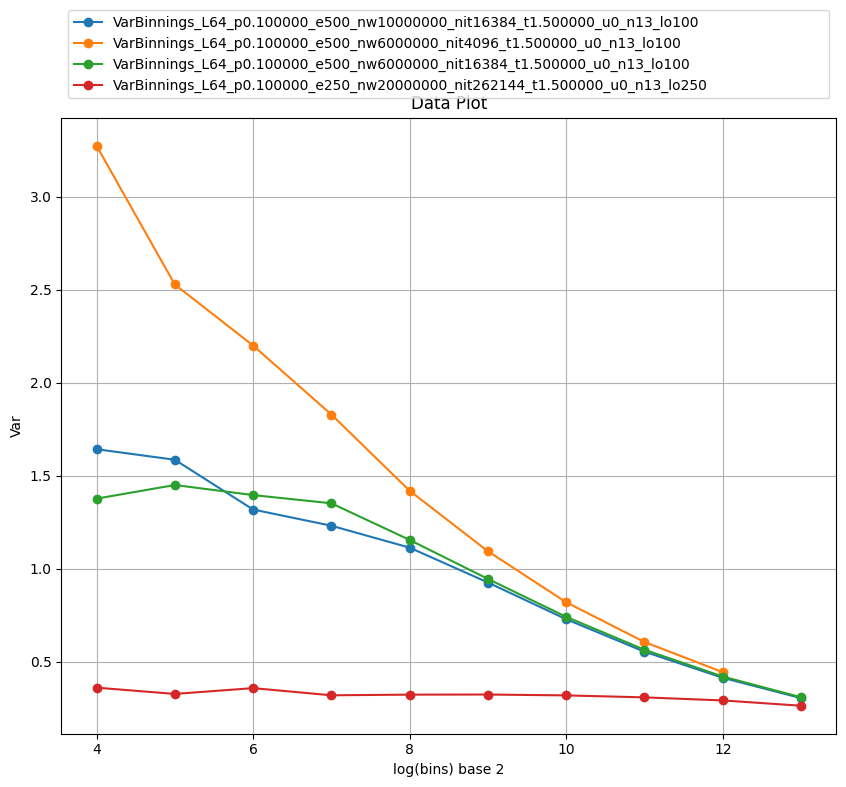

In [7]:
plt.figure(figsize=(10,8))
for f in os.listdir('./optim/results/Variances/p010/t1.5'):
    # Lists to store data points
    x_values = []
    y_values = []
    # Read data from the file
    with open("./optim/results/Variances/p010/t1.5/"+f, 'r') as file:
        for line in file:
            # Split each line into two parts separated by a space
            parts = line.split()
            if(int(parts[0]) >= 4):
                # Append the first part (x value) converted to integer
                x_values.append(int(parts[0]))
                # Append the second part (y value) converted to float
                y_values.append(float(parts[1]))
    # Plot the data
    plt.plot(x_values, y_values, marker='o', linestyle='-', label=f)
plt.xlabel('log(bins) base 2')
plt.ylabel('Var')
plt.title('Data Plot')
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",mode='expand')
plt.grid(True)
plt.show()

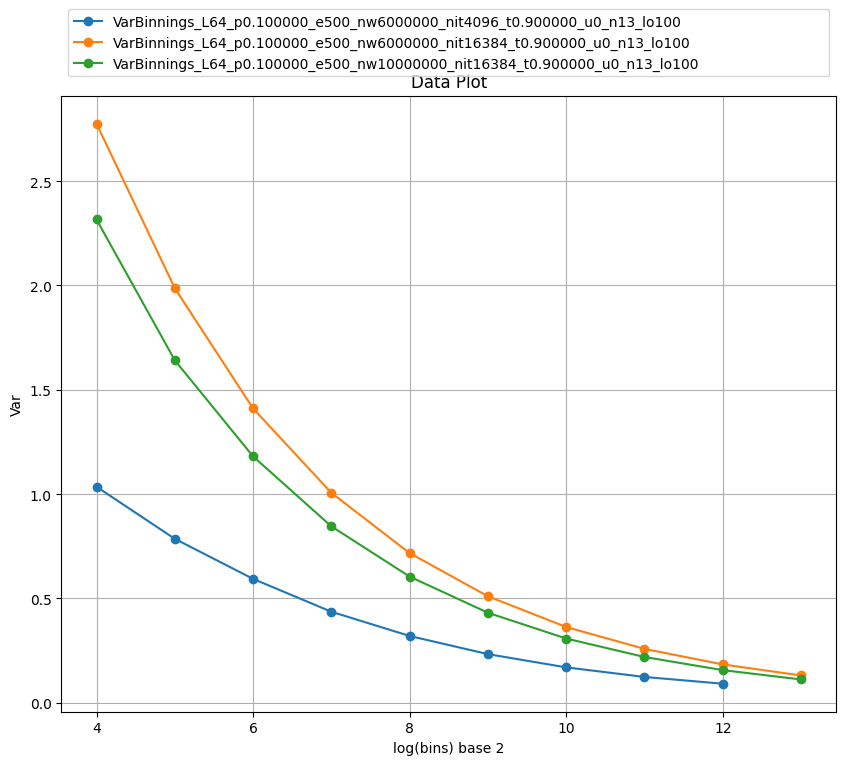

In [ ]:
plt.figure(figsize=(10,8))
for f in os.listdir('./optim/results/Variances/p010/t0.9'):
    # Lists to store data points
    x_values = []
    y_values = []
    # Read data from the file
    with open("./optim/results/Variances/p010/t0.9/"+f, 'r') as file:
        for line in file:
            # Split each line into two parts separated by a space
            parts = line.split()
            if(int(parts[0]) >= 4):
                # Append the first part (x value) converted to integer
                x_values.append(int(parts[0]))
                # Append the second part (y value) converted to float
                y_values.append(float(parts[1]))
    # Plot the data
    plt.plot(x_values, y_values, marker='o', linestyle='-', label=f)
plt.xlabel('log(bins) base 2')
plt.ylabel('Var')
plt.title('Data Plot')
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",mode='expand')
plt.grid(True)
plt.show()

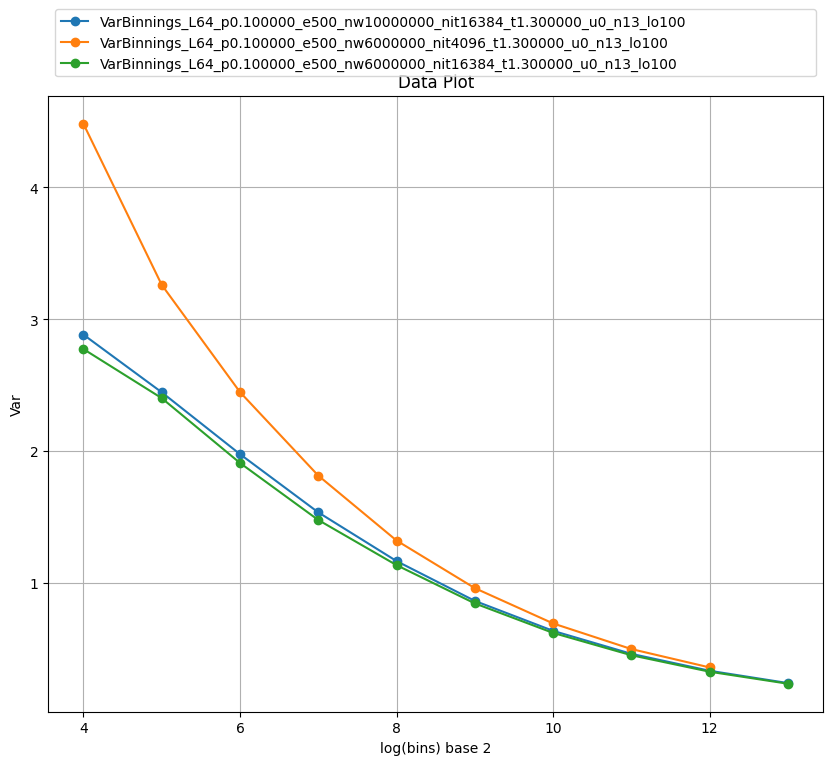

In [ ]:
plt.figure(figsize=(10,8))
for f in os.listdir('./optim/results/Variances/p010/t1.3'):
    # Lists to store data points
    x_values = []
    y_values = []
    # Read data from the file
    with open("./optim/results/Variances/p010/t1.3/"+f, 'r') as file:
        for line in file:
            # Split each line into two parts separated by a space
            parts = line.split()
            if(int(parts[0]) >= 4):
                # Append the first part (x value) converted to integer
                x_values.append(int(parts[0]))
                # Append the second part (y value) converted to float
                y_values.append(float(parts[1]))
    # Plot the data
    plt.plot(x_values, y_values, marker='o', linestyle='-', label=f)
plt.xlabel('log(bins) base 2')
plt.ylabel('Var')
plt.title('Data Plot')
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",mode='expand')
plt.grid(True)
plt.show()

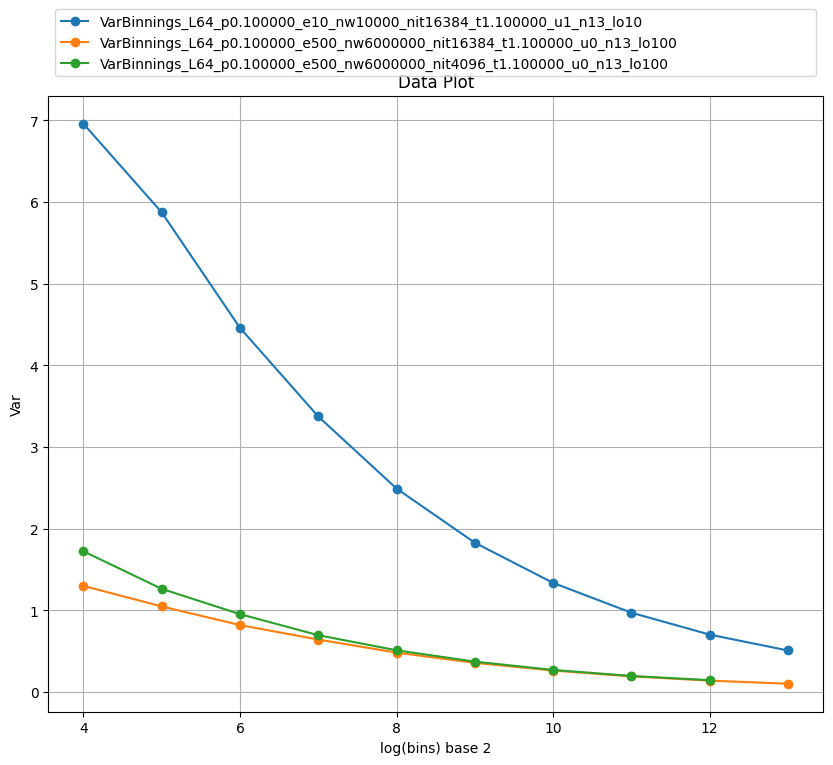

In [ ]:
plt.figure(figsize=(10,8))
for f in os.listdir('./optim/results/Variances/p010/t1.1'):
    # Lists to store data points
    x_values = []
    y_values = []
    # Read data from the file
    with open("./optim/results/Variances/p010/t1.1/"+f, 'r') as file:
        for line in file:
            # Split each line into two parts separated by a space
            parts = line.split()
            if(int(parts[0]) >= 4):
                # Append the first part (x value) converted to integer
                x_values.append(int(parts[0]))
                # Append the second part (y value) converted to float
                y_values.append(float(parts[1]))
    # Plot the data
    plt.plot(x_values, y_values, marker='o', linestyle='-', label=f)
plt.xlabel('log(bins) base 2')
plt.ylabel('Var')
plt.title('Data Plot')
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",mode='expand')
plt.grid(True)
plt.show()